In [152]:
import quandl
quandl.ApiConfig.api_key = "SR7LxL3vRbxu8zibz6Sy"

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import numpy as np
import pandas as pd

import pickle as pk

In [153]:
def days_to_date(days, start_date):
    return start_date + pd.to_timedelta(days, unit='D')

In [28]:
# Download data from Quandl

# for i in range(1, 39):
#     symbol = f'CME_CL{i}'
#     quandl.get(f"CHRIS/{symbol}").to_csv(f"Quandl_data/{symbol}.csv")

In [154]:
temp = pd.read_csv(f"Quandl_data/CME_CL1.csv", index_col='Date', parse_dates=True)
df = pd.DataFrame({'date': temp.index.values,
                   'T': 1,
                   'F': temp['Last'].values}).resample('1D', on='date').sum()

for i in range(2, 39):
    symbol = f'CME_CL{i}'
    temp = pd.read_csv(f"Quandl_data/{symbol}.csv", index_col='Date', parse_dates=True)
    df = pd.concat([df, 
                    pd.DataFrame({'date': temp.index.values,
                                  'T': i,
                                  'F': temp['Last'].values}).resample('1D', on='date').sum()
                   ])
    
df.reset_index(inplace=True)

start_date = df['date'].min()
df['t'] = (df['date'] - start_date).dt.days
df['F'].replace({0: np.nan}, inplace=True)

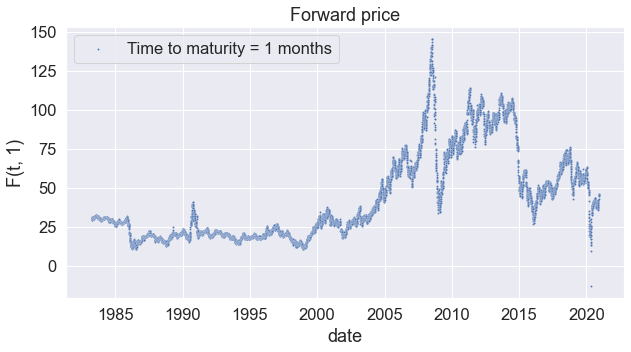

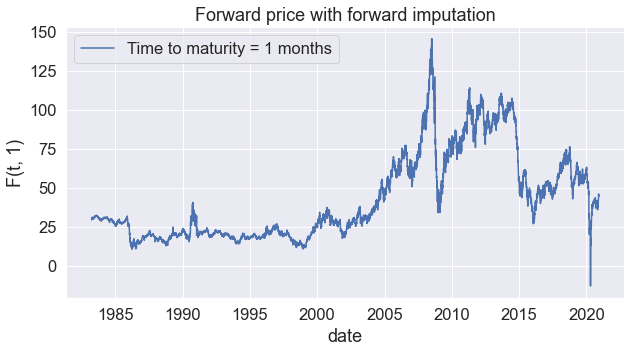

In [178]:
T = 1

# Plot forward curve for a givent T
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(ax=ax, x='date', y='F', data=df[df['T'] == T].fillna(0), label=f'Time to maturity = {T} months', s=4)
ax.set(title='Forward price', ylabel=f'F(t, {T})')
plt.show()

# Plot forward curve for a givent T
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(ax=ax, x='date', y='F', data=df[df['T'] == T].fillna(method='ffill'), label=f'Time to maturity = {T} months')
ax.set(title='Forward price with forward imputation', ylabel=f'F(t, {T})')
plt.show()

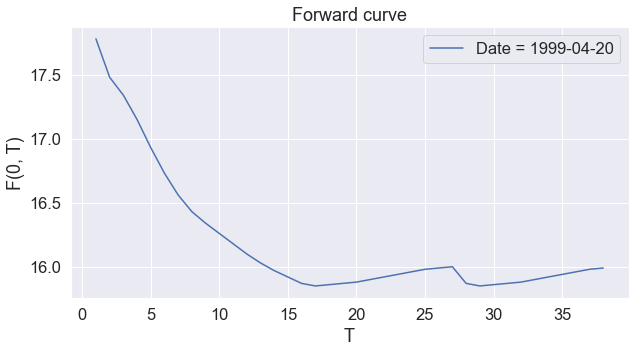

In [177]:
clewlow_graph_dates = ['01/01/99','12/01/99','21/01/99','01/02/99','10/02/99','19/02/99','02/03/99','11/03/99','22/03/99','31/03/99','09/04/99','20/04/99','29/04/99','10/05/99','19/05/99','28/05/99',]
date = pd.to_datetime(clewlow_graph_dates[-5], format='%d/%m/%y')

# plot forward curve for given date:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(ax=ax, x='T', y='F', data=df[df['date'] == date], label=f'Date = {date.date()}')
ax.set(title='Forward curve', ylabel='F(0, T)')
plt.show()

In [ ]:
for T in df['T'].unique():
    df[df['T']==T].fillna(method='ffill', inplace=True)

Text(0.5, 0.92, 'F(t, T)')

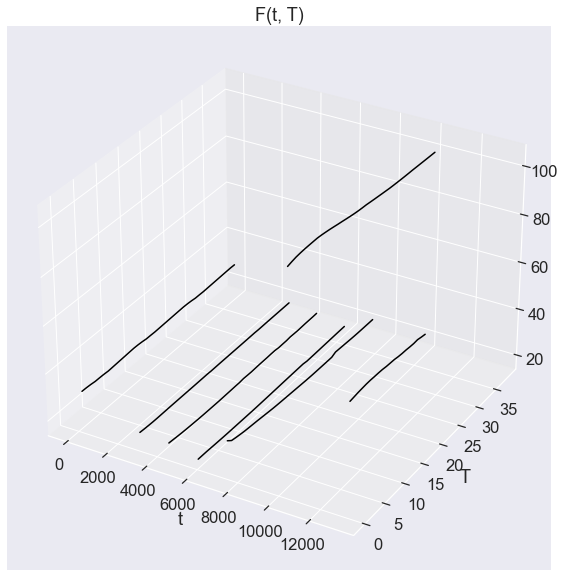

In [165]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(xs=df['t'], ys=df['T'], zs=df['F'], s=1)

for t in df['t'].unique():
    if t % 1460 == 0:
        ax.plot(xs=[t]*len(df[df['t'] == t]), ys=df[df['t'] == t]['T'], zs=df[df['t'] == t]['F'], color='black')
plt.xlabel('t', fontsize=18)
plt.ylabel('T', fontsize=18)
plt.title('F(t, T)', fontsize=18)

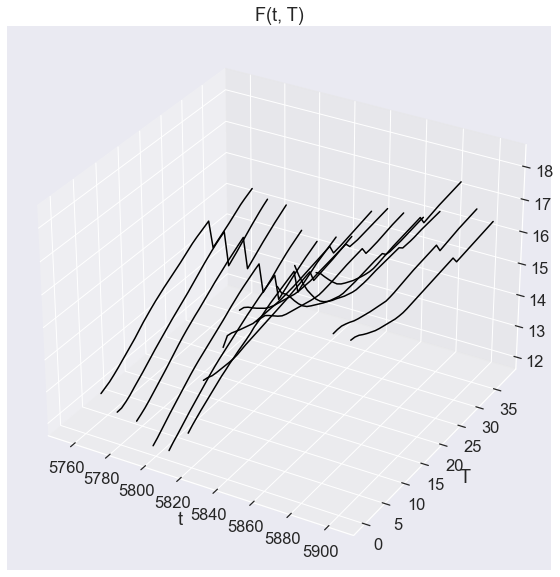

In [160]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

clewlow_graph_dates = ['01/01/99', 
                       '12/01/99',
                       '21/01/99',
                       '01/02/99',
                       '10/02/99',
                       '19/02/99',
                       '02/03/99',
                       '11/03/99',
                       '22/03/99',
                       '31/03/99',
                       '09/04/99',
                       '20/04/99',
                       '29/04/99',
                       '10/05/99',
                       '19/05/99',
                       '28/05/99',
                      ]
temp = df[df.date.isin(pd.to_datetime(clewlow_graph_dates, format='%d/%m/%y'))]

for t in temp['t'].unique():
    ax.plot(xs=[t]*len(temp[temp['t'] == t]), ys=temp[temp['t'] == t]['T'], zs=temp[temp['t'] == t]['F'], color='black')
plt.xlabel('t', fontsize=18)
plt.ylabel('T', fontsize=18)
plt.title('F(t, T)', fontsize=18)
plt.show()

In [148]:
temp['T'] *= 30

<ipython-input-148-8e6007c40fb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['T'] *= 30


In [150]:
t_grid = temp['t'].unique()
T_grid = temp['T'].unique()[1:]
# interp_grid = np.meshgrid(t_grid, T_grid)
interp_grid = np.array([t_grid, T_grid])
interp_grid

<ipython-input-150-b155715298a5>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  interp_grid = np.array([t_grid, T_grid])


array([array([5756, 5767, 5776, 5787, 5796, 5805, 5816, 5825, 5836, 5845, 5854,
       5865, 5874, 5885, 5894, 5903], dtype=int64),
       array([  30,   60,   90,  120,  150,  180,  210,  240,  270,  300,  330,
        360,  390,  420,  450,  480,  510,  540,  570,  600,  630,  660,
        690,  720,  750,  780,  810,  840,  870,  900,  930,  960,  990,
       1020, 1050, 1080, 1110, 1140], dtype=int64)], dtype=object)

In [151]:
def value_from_df(t, T):
    return temp[(temp['t'] == t) & (temp['T'] == T)]['F'].values[0]

In [166]:
value_from_df(5825, 30)

14.31

In [143]:
def F(grid):
    func_values = np.zeros(shape=(len(grid[0]), len(grid[1])))
    for i, t in enumerate(grid[0]):
        print(t)
        for j, T in enumerate(grid[1]):
            func_values[i, j] = value_from_df(t, T)
    return func_values

In [ ]:
F(interp_grid)

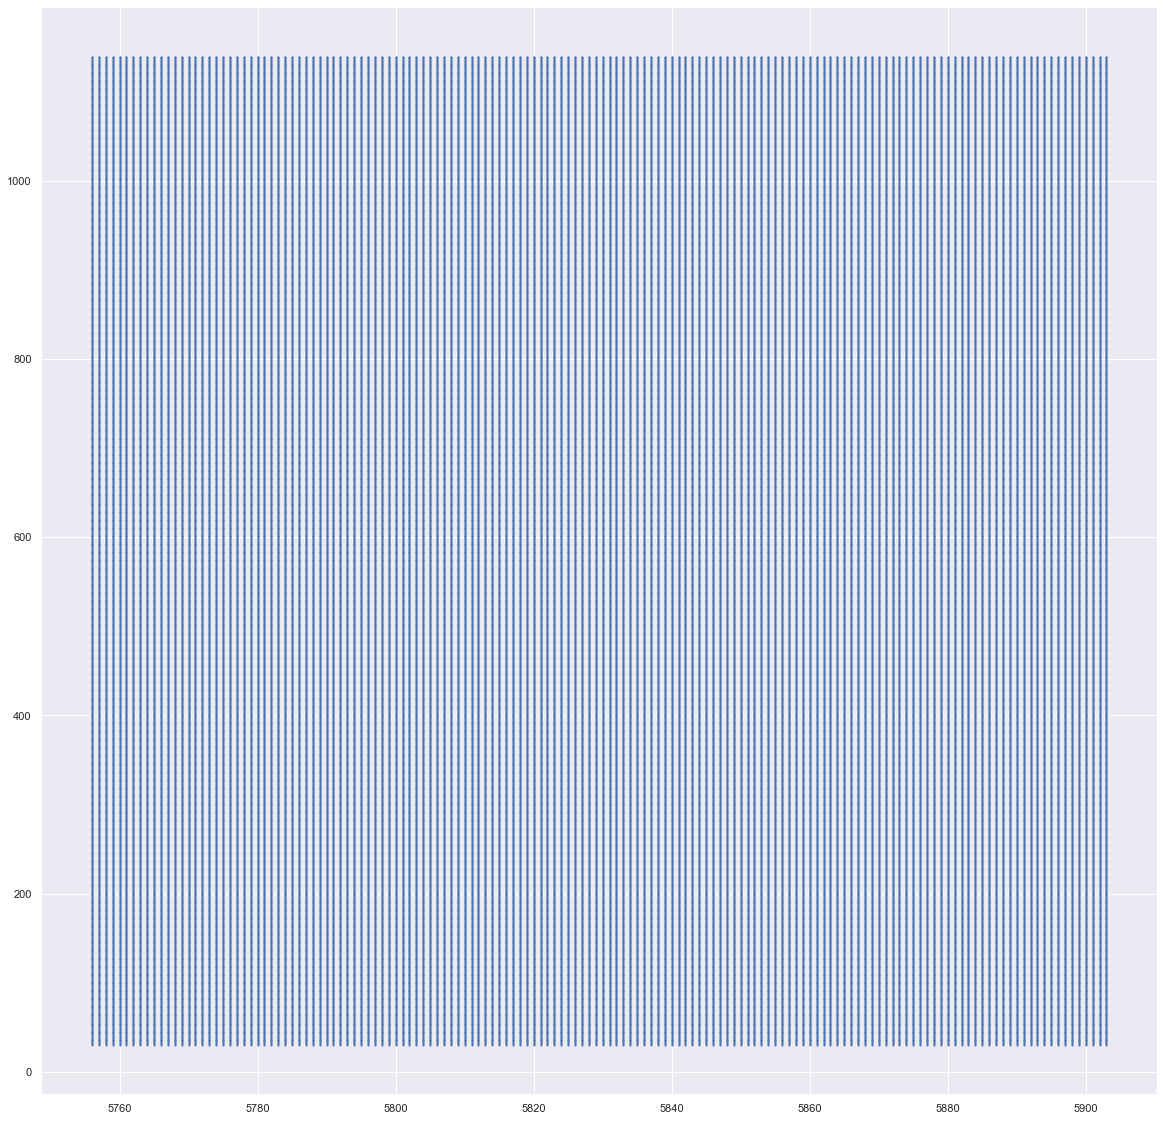

In [102]:
plt.figure(figsize=(20, 20))
plt.scatter(*interp_grid, s=1)

In [ ]:
for T in df['T'].unique():
    if df[df['T'] == T]['F'].isna():
        

In [178]:
df[df['F']==0] = np.NaN